In [2]:
from demo import img2latex, pdf2latex, postprocess
from model.img2seq import Img2SeqModel
from model.utils.general import Config, run
from model.utils.text import Vocab
from IPython.display import Image, display, Math, Latex
from wand.image import Image as WImage
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
dir_output = "/home/paulluh/im2latex_weights/1/"
config_vocab = Config(dir_output + "vocab.json")
config_model = Config(dir_output + "model.json")
vocab = Vocab(config_vocab)

model = Img2SeqModel(config_model, dir_output, vocab)
model.build_pred()
model.restore_session(dir_output + "model.weights/")

Building model...
- done.
Reloading the latest trained model...


INFO:tensorflow:Restoring parameters from /home/paulluh/im2latex_weights/1/model.weights/


Restoring parameters from /home/paulluh/im2latex_weights/1/model.weights/


Pixel Dimensions: (50, 120, 3)
K _ { \mathrm { o c } } = \frac { K _ { d } } { \d \Psi _ { 6 } C } \times 1 0 0


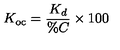

<IPython.core.display.Math object>

In [59]:
latex, img = pdf2latex(model, 'data/pdf/test.pdf')
print(latex)
display(Image(img))
display(Math(latex))

Pixel Dimensions: (50, 120, 3)


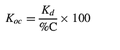

<IPython.core.display.Math object>

In [7]:
seq = iaa.Sequential([
    iaa.GammaContrast(2)
])
latex, _, img_path = img2latex(model, 'data/equations/0.png', downsample_image_ratio=2, cropping=True, padding=True, gray_scale=True)
latex = postprocess(latex)
display(Image(img_path))
display(Math(latex))

Pixel Dimensions: (50, 120, 3)


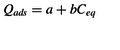

<IPython.core.display.Math object>

In [151]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.GammaContrast(2)
])

latex, _, img_path = img2latex(model, 'data/sandbox/5-4.png', downsample_image_ratio=2, cropping=True, padding=True, gray_scale=True,
                              img_augment=seq)
display(Image(img_path))
latex = postprocess(latex)
display(Math(latex))

Pixel Dimensions: (50, 120, 3)
{ \cal Q } _ { a d s } = a + b C _ { e q }


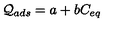

<IPython.core.display.Math object>

In [146]:
latex, img = pdf2latex(model, 'data/pdf/test2.pdf')
print(latex)
display(Image(img))
display(Math(latex))